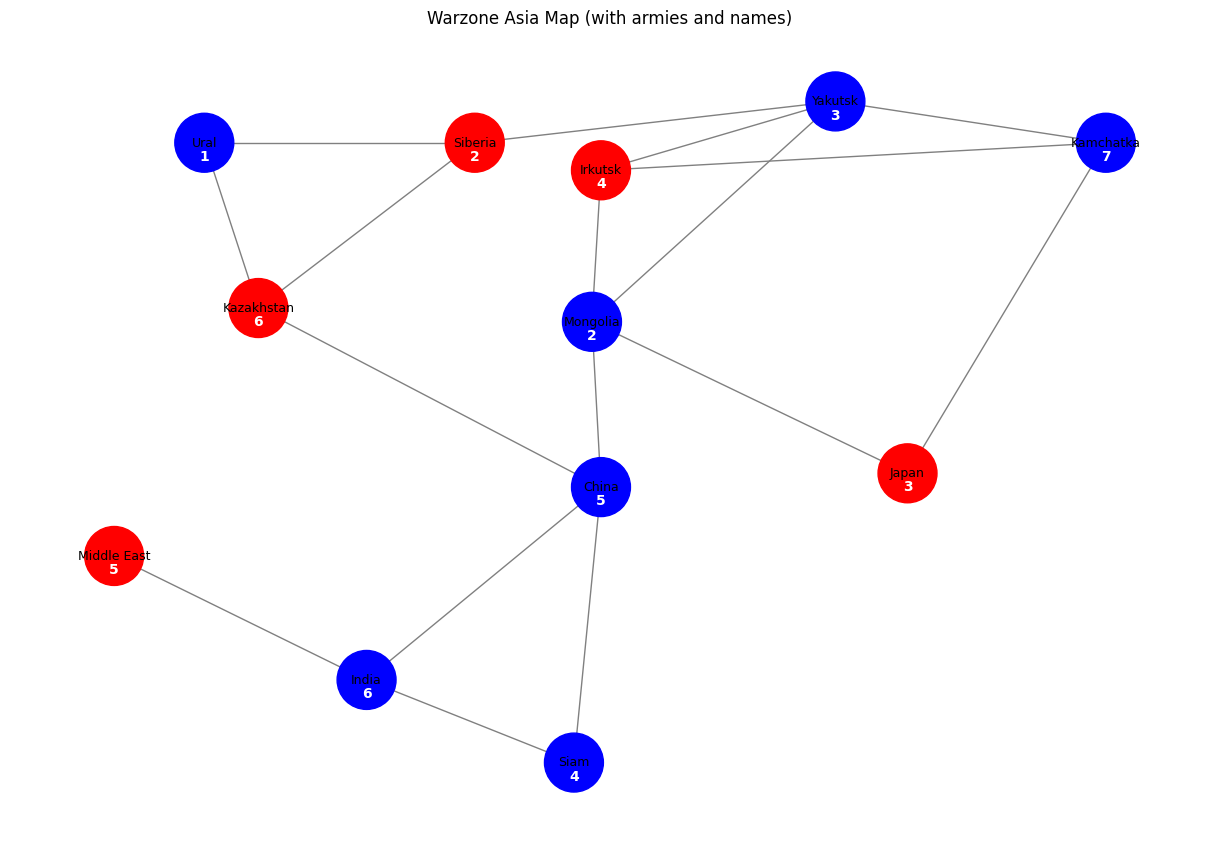

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Geographic positions
region_positions = {
    "Siam": (101, 15),
    "India": (78, 21),
    "Middle East": (50, 30),
    "Japan": (138, 36),
    "Mongolia": (103, 47),
    "China": (104, 35),
    "Kazakhstan": (66, 48),
    "Irkutsk": (104, 58),
    "Kamchatka": (160, 60),
    "Yakutsk": (130, 63),
    "Siberia": (90, 60),
    "Ural": (60, 60),
}

# Edges between regions
region_edges = [
    ("India", "Siam"),
    ("India", "Middle East"),
    ("India", "China"),
    ("China", "Siam"),
    ("China", "Mongolia"),
    ("China", "Kazakhstan"),
    ("Kazakhstan", "Ural"),
    ("Kazakhstan", "Siberia"),
    ("Mongolia", "Irkutsk"),
    ("Mongolia", "Yakutsk"),
    ("Irkutsk", "Yakutsk"),
    ("Irkutsk", "Kamchatka"),
    ("Yakutsk", "Kamchatka"),
    ("Japan", "Kamchatka"),
    ("Mongolia", "Japan"),
    ("Ural", "Siberia"),
    ("Siberia", "Yakutsk"),
]

# Example game state
region_data = {
    "Siam": {"owner": "PlayerA", "armies": 4},
    "India": {"owner": "PlayerA", "armies": 6},
    "Middle East": {"owner": "PlayerB", "armies": 5},
    "Japan": {"owner": "PlayerB", "armies": 3},
    "Mongolia": {"owner": "PlayerA", "armies": 2},
    "China": {"owner": "PlayerA", "armies": 5},
    "Kazakhstan": {"owner": "PlayerB", "armies": 6},
    "Irkutsk": {"owner": "PlayerB", "armies": 4},
    "Kamchatka": {"owner": "PlayerA", "armies": 7},
    "Yakutsk": {"owner": "PlayerA", "armies": 3},
    "Siberia": {"owner": "PlayerB", "armies": 2},
    "Ural": {"owner": "PlayerA", "armies": 1},
}

# Player color mapping
owner_colors = {
    "PlayerA": "blue",
    "PlayerB": "red",
    "Neutral": "gray"
}

# Create graph
G = nx.Graph()
G.add_nodes_from(region_positions)
G.add_edges_from(region_edges)

# Node visuals
node_colors = [owner_colors[region_data[n]["owner"]] for n in G.nodes()]
army_labels = {n: str(region_data[n]["armies"]) for n in G.nodes()}
positions = region_positions

# Slight vertical offset for region name labels
region_name_offset = {k: (v[0], v[1] - 1) for k, v in positions.items()}  # Move names upward

# Plot
plt.figure(figsize=(12, 8))

nx.draw(
    G, pos=positions, with_labels=False, node_color=node_colors,
    node_size=1800, edge_color="gray"
)

# Army count (centered)
nx.draw_networkx_labels(G, pos=region_name_offset, labels=army_labels, font_color="white", font_weight="bold", font_size=10)

# Region names (above)
nx.draw_networkx_labels(G, pos=positions, labels={k: k for k in G.nodes()}, font_color="black", font_size=9)

plt.title("Warzone Asia Map (with armies and names)")
plt.axis("off")
plt.show()
